# Introduction to Pandas


## Learning objectives

Throughout this session we're going to be teaching you a range of tools and skills related to cleaning, manipulation and visualising large datasets. Using the pandas package, we can read in and manipulate large spreadsheets of data, and matplotlib lets you visualise these datasets in a useable, customisable format.

The three over-arching themes I'll be taking you through today are:

- Data examination
- Dataframe manipulation
- Plotting your data with pyplot


## Setting Up

First, we need to import Python's *pandas*, *matplotlib* and *numpy* packages, and then use inline plotting "magic" command so that all plots generated will appear within this notebook instead of in a new browser tab.

While numpy isn't directly related to this course, it's handy for generating random values, which will be useful when learning how to create your own dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [ ]:
%pylab inline

## A Basic Pandas Introduction

- creating your own dataframe
    - the "DataFrame" and "Series" objects
- subsetting columns
- subsetting rows
    - slicing
    - `loc` vs `iloc`


### Lists are kind of like excel columns Right?

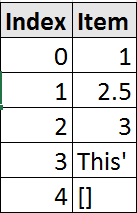

### And with Numpy Arrays, we can do maths on our lists just like excel spreadsheet columns


In [ ]:
a = np.array([5,1,6])
b = np.array([7,8,9])
a+b

In [ ]:
np.sort(a)+ b

### But what if we want to keep our "columns" of data linked to each other?

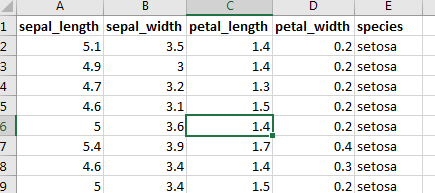

What we want is for each of our list columns to share an index in the end right?

### Well we can with our new best Friend(or frenemy) the Pandas Dataframe

A  Pandas Data Frame can be thought of as a dictionary where
- Columns names are the dictionary Keys
- and the data (stored in numpy arrays) in the Columns are the dictionary Values
    - These columns are Numpy arrays, and therefore ***all the items are coerced into one data type***
    - All of these columns share an  index ***that you can specify!***



In [ ]:
df_dictionary = {"A":['a','b','c','d','e','f'],
                   "B":np.random.randn(6),
                   "C": [1,7,20,59,30,40]}

df = pd.DataFrame(df_dictionary,
                  index = [47,48,49,1,2,3]
    )

In [ ]:
df

**See it even kind of looks like a spreadsheet when Pandas shows it to you**


### Since it is essentially a dictionary full of numpy arrays and we can
- subset one or more columns
- index and slice rows of the arrays
- Do array mathematics between columns to create new columns
- It is also, Mutable(we can change data), iterable, and needs to be copied properly see function```pandas.DataFrame.copy()```

#### Subsetting Columns

To select a particular column in your dataframe, you can use one of two options:

1) Calling the column as an "attribute"
    - `df.columnName`

2) Subsetting the dataframe
    - `df['columnName']`

The first option is useful for some functions, but the second form is essential if you want to call more than column at once. You do this by inserting a list, [], of column names, instead a single column.

For example: `df[["Column1", "Column2", ... , etc]]`

We're first going to try this on our toy dataset from earlier, for ease of use.

In [ ]:
df

In [ ]:
# As a subset
df['A']

In [ ]:
#As an attribute
df.B

In [ ]:
# and we can add two columns together 
df["d"] = df.B+df.C  # note we created a new column just like you would create a new key value pair in a list
df

In [ ]:
# Try subsetting the first two columns
df[['A','B']]

In [ ]:
# What happens if you change the order around?
df[['B',"A"]]

In [ ]:
# What about a column that doesn't exist?
df['a']

#### Slicing and subsetting rows
- We can slice and subset our rows just like we would slice and subset a string, list, or numpy array
 `df[rowNumbers]`
 - This uses an integer index that exists outside of the index we specify

In [ ]:
# notice that its not using our index in this case
df[2:6] 

#### To subset columns and rows, we approach it like a nested list 
- ```df[columns we want][row slice we want]

In [ ]:
#gives rows 0 through 7 of Location and Counts
df[["A", "B"]][:5:3]

In [ ]:
# Remember when I said it was mutable?
df["B"][:3] = -2.2
df

#### Pandas is picky about how you change slices of data frames, its best to use  `loc` and `iloc` for this purpose
** Syntax**



`iloc` is positional based, so only takes integer values that correlate with the row and column numbers you want to subset
- ```DataFrame.loc[integer indices of row slice, integer indices of column slice]```

`loc` is label based, and takes the row and column **labels** as inputs
- ```DataFrame.loc[slice of row labels, slice of column labels]```

In [ ]:
#Using iloc to get rows 0, 1 and 2
df.iloc[:3,:2]

In [ ]:
df

In [ ]:
# Using loc to get row labels 1, 2 and 3
df.loc[47:49,'B'] = -3.3
df.loc[47:49,'B']

If you only enter one set of values into `loc` and `iloc`, they will return the values for **every column in your dataset.**

By using a second integer though, you can choose which rows and columns you specifically want to subset. The first value corresponds to the row, and the second to the columns, or **rows x columns**. You can also think of this with the moniker *"Roman Catholic"*

In [ ]:
# Using loc to get row labels 1, 2 and 3 for Columns A and B


In [ ]:
# Using iloc to get rows 0, 1 and 2 for columns 0 and 1.


The differences between `loc` and `iloc` can seem minor, but they're very important, and which one you should use depends on what your needs are at the time.

`iloc` is based on dataframe position, so calling `iloc[:3]` would give you rows 0 through 3. 

`loc` however is based on the index label, so if you were to call `df.loc[:3]`, it would give you all rows UP TO the row labelled as index 3.

While the indexes are in order and all present, this isn't an issue. Consider what happens when the indexes are out of order though, with our dataframe 's'

In [ ]:
# Can see that this only takes the first 2 rows
df.loc[:3]

In [ ]:
# Whereas this takes all rows UP TO index label 2
df.iloc[:3]

Since `loc` is based on labels, if you try to subset a row or column label that doesn't exist, even if it corresponds to a positional row, python will throw you an error

Due to this, it's important that you carefully consider which tool is appropriate for your needs

#### Challenge 1

Consider the following Python dictionary data and Python list labels:

```Python 
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.1**

Create a DataFrame `vet_info` from this dictionary data which has the index (i.e. row names) `labels`

In [ ]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

**1.2**

Return the first 3 rows of the DataFrame `vet_info`.

**1.3** 

Select just the 'animal' and 'age' columns from `vet_info`.

**Part 4** 

Select the data in rows [3, 4, 8] and in columns ['animal', 'age'].

** Part 5**

make a new column called 'vis_per_age' as the number of visits divided by the animal age

### Ok, so we know the basics of manipulating our data frames
- We can create a dataframe from a dictionary, and specify row labels
- We can subset our dataframe by column, and slice different rows
- we know how to use positional index, and our labels to subset our dataframes
- we have changed our dataframes with the `loc[]` and `iloc[]` methods

### 2. Lets slice some data up
- Lets use some logic to filter out data frames based on values in columns and rows
- and deal with Nan data

# Applying our knowledge

#### Research Question:
https://youtu.be/OeYEyCDRHmE

The Melbourne Based band released the song "4 Seasons in a day" in 1992, However there is an ongoing debate as to the city it is based on, The Finn brothers formed their band in Melbourne, but they grew up in Auckland. SO in order to shut those Kiwis (or give them their credit) down Our research question is:

How often does Melbourne have 4 seasons in a day?

The data we have are the 
- maximum daily temperatures since 1851
- minimum daily temperatures since 1851
- mean monthly temperatures

#### So a proposed way to study this:

**Tasks**

- Upload the data into dataframes
- Clean it up (filter out nan values, Values where min is greater than max and there may be in instrument error)
- Decide what temperatures constitute a season
- Figure out how often there are four seasons in a day in melboure
- ***Extra credit*** do the same thing for Auckland

## Reading in Data

The first step to any data exploration and manipulation is to open your data within your program. The **pandas** package can directly read in spread-sheet style data and convert them into *dataframes*.

To read in a comma-separated file, or \*.csv, you can use the pandas function `read_csv()`

In [ ]:
# Reading in a *.csv file
df_daily = pd.read_csv("melbourne_daily2.csv")

You can also open a variety of other file types using the "reader" functions found in this [IO tools documentation](http://pandas.pydata.org/pandas-docs/version/0.20/io.html "Pandas IO tools"). 


In [ ]:
df_daily.head()

### hmmm, thats not what we really wanted was it? Lets Google it!

In [ ]:
column_names = ['Datetime','min_T','max_T']

## Examining your Data

- `head()`, `tail()`
- `shape`; `shape[0]` vs. `shape[1]`
- `columns`
- `dtypes`

For example, `df.head()` and `df.tail()` show you the first/last 5 rows of your dataframe selection

In [ ]:
df_daily.tail()

You can also specify how many rows you want `head` and `tail` to return

The `shape` function gives you the dimensions of your data, in the form `(#rows, #columns)`.

In [ ]:
# This returns a tuple (or linked pairs) of the number of rows and columns in your dataframe.
df_daily.shape

So we can see here that we have 658,823 rows, and 6 columns in our dataframe

In [ ]:
# Calling the first or second element of the tuple can give you either the rows or the columns
#Gives you the rows (remember, 0 indexing!)
print(df_daily.shape[0])

#Gives you the columns
print(df_daily.shape[1])

You can also use `df.columns` to examine the column names.

In [ ]:
# What are the column names in your dataframe?
df_daily.columns

You can also examine the data types inside your columns using `dtypes`

Knowing what type of data is in your dataframe is extremely important, as it limits what functions you can and can't do on that column. It's useless to try and do string manipulations on an integer, or try to find the sum of a column of names.

Within pandas, str = "object", int = "int64", and float = "float64"

In [ ]:
df_daily.dtypes

Now that we know the shape and size of our table, and what its made of.....

### Challenge 2: Lets Examine our data a bit more closely


**2.1** Since we are thinking about the spread of temperatures on a given day, Lets create a new column named "T_diff" that = max_T - min_T

**2.2** Look up the Method count() and run it, do all columns have the same amount of data?

**2.3** Use the method's `max()`, and `min()` to find the following answers
- What is the maximum of the max_T column
- what is the minimum of the T_diff column
- What is the maximum of the min_T column

**2.4** Things look kind of funny no? Use the `describe()` method  to have another look and discuss with your table what errors may be in the dataset

### What we already know now
- We can make dataframes from dictionaries, and upload them from csv files
- We can subset columns and rows and change slices of data
- we can make new columns from the data in other columns
- we have learned some key attributes and methods to get a sense of whats in our dataset

### And there are some problems with our dataset that we would like to filter out maybe?

### Subsetting with conditionals
We can subset our pandas dataframes according to Python's logical operators 
* `==` or `!=`
* `>` or `<`
etc.

For example, if I want to find all of the rows in our toy dataframe, `df` where `C > 30`, I would type:

In [ ]:
df[df["C"]>30]

Just as with lists and for loops, etc, you can also combine these conditionals using & {and} , or | {or}

In [ ]:
df

In [ ]:
#Find the rows where B < 0.5 AND C > 30
df_filt = df[(df["C"]>30) & (df["B"]< 0.5)]
df_filt

In [ ]:
#You can also get a list of the row indexes for your subset
filt_index = list(df[(df["C"]>30) & (df["B"]< 0.5)].index)
print(filt_index, 'indices where conditions are true')
df.loc[filt_index]

Similarly, you can subset using a list of boolean values

In [ ]:
# a boolean list. The 1st, 3rd and 5th values are True.
na = [True,False,True,False,True,False]

df[na] #subsets the 1st, 3rd and 5th rows

#### Challenge 3

Now that we know how to filter out data that does not match our conditions, lets solve the issue we discovered 2.3

##### Optional Extra

Suppose you have DataFrame with 10 columns of real numbers, for example

`df2 = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))`

Which column of numbers has the smallest sum? Find that column's label.

*Hint: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmin.html*

## Finding Null Data

Earlier, we explored the use of `shape` to determine the dimensions of our dataframe. Another way to do this is with `count`.

In [ ]:
df_daily.count()

### This means that we have some NAN values where data must not have been collected

You can check which columns inside our test dataframe, df, contains null values by using `isnull()`.


In [ ]:
df = pd.DataFrame({"A":['a','b','c',np.nan,'e','f'],
                   "B":np.random.randn(6),
                   "C": [np.nan,7,np.nan,59,np.nan,40]},
                  index = [47,48,49,1,2,3]
    )
df

In [ ]:
df.isnull()

### Resolving Null Data: Search and Destroy!

- There are 2 ways to resolve Null data - replace it with new data, or delete them. To day we delete them

### Deleting Null Data

- We can use the inverse of the `DataFrame.isnull()` method - `DataFrame.notnull()`

In [ ]:
#we can use it on a column
df[df.C.notnull()]

**Challenge 4**
Get rid of all the nulls in our data set that we have already filtered above (remember challenge three)

***Hint:*** Not null only works on Columns, not the whole dataframe

### What we already know now
- We can make dataframes from dictionaries, and upload them from csv files
- We can subset columns and rows and change slices of data
- we can make new columns from the data in other columns
- we have learned some key attributes and methods to get a sense of whats in our dataset
- How to subset dataframes based on values in the dataframes
- how to filter out null data

### What next? Finally some analysis
- So we probably need to define what kind of temperature swings equate to four seasons right? So we probably need to categorize our data into seasons, and look at the subsets of those populations right?

In [ ]:
df_daily.head()

In [ ]:
df_daily.dtypes

** Date time is just a string, we probably want it to be a date time sort of object and use that to categorize our seasons**
- We will use the `DataFrame.astype()` method, and the `np.datetime64` datatype

In [ ]:
df_daily['Datetime'] = df_daily['Datetime'].astype(np.datetime64)

In [ ]:
df_daily.dtypes

**Soooo....** What ave we created here?

In [ ]:
df_daily.loc[2,'Datetime']

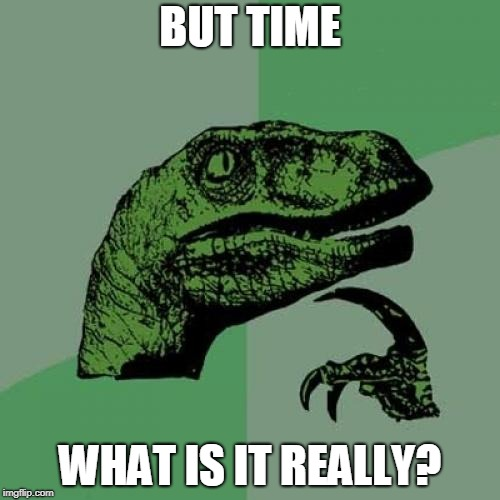

### Pandas has its own Timestamp (a moment in time) and Timedelta ( an amount of time) for workign with time series data

#### With Heaps of attributes

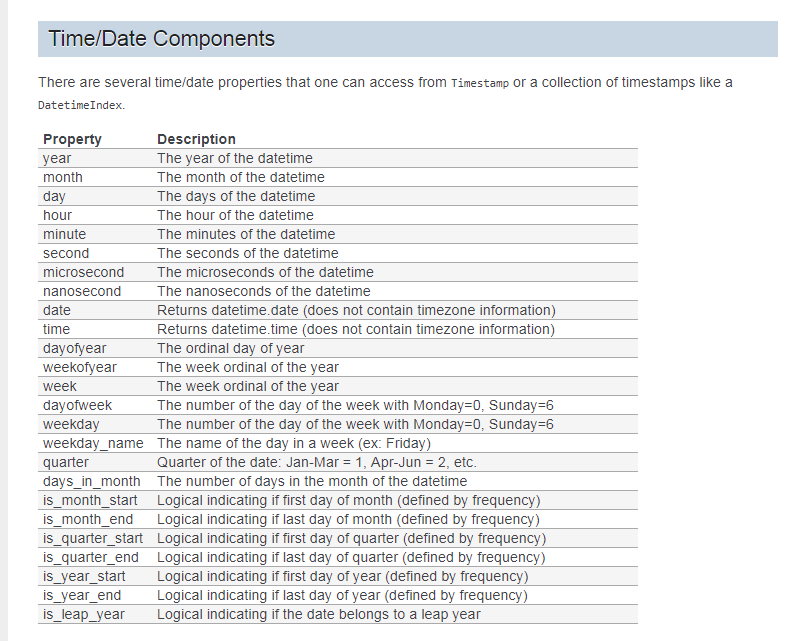

- but right now we probably just want to make a month

In [ ]:
df_daily['month'] = df_daily.Datetime.dt.month #note the dt is tellin Pandas that we want to access the timestamp data

In [ ]:
df_daily.head()

**Challenge 5** 
Now that we have our months, lets create a new column called "season' and fill it with the correct season usign our logical operator knowledge
- Summer - December - February
- Autumn - March - May
- Winter: June - August
- Spring - September - November

## Grouping Data with `DataFrame.groupby()`

- Probably the most powerful thing to do with  these datasets is subset them to compare values between data with different attributes

In [ ]:
vet_data = pd.DataFrame(data, index=labels)
vet_data

In [ ]:
vet_data.groupby(by = 'animal')

Group by is akin to a Factor in an R dataframe, and you can use a lot of its functionality without having to turn it into a categorical data type: It's even nifty as an optional argument in Pandas plotting routines!

In [ ]:
vet_data.boxplot('age', by= 'animal')

** Note** More plotting options found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html

### Final Challenge: Does Melbourne have Four Seasons in a day

- You now have the resources to really ask this question, with our groupby function, we can calculate summary statistics about maximum and minimum temperatures for each season
- and with our logical filtering we can subset all the days where there are four seasons, and see how often it happens right?
- maybe try and plot that up with a pie chart?

# Summary

I hope this has been an informative, although limited, introduction into the plotting and functional capabilites of the Pandas library. There are still many things you can learn, and many other ways to use it. If you're stuck, don't be afraid to throw as many key words into Google Overlord as possible, and hope that the people at StackOverflow have been kind enough (and kind) to answer a similar question.

To keep you going on your journey, here are a few tutorials or Pandas-based problem sets you might like to use to practice:  
* [Github Repo 1](https://github.com/guipsamora/pandas_exercises)
* [Github Repo 2](https://github.com/ajcr/100-pandas-puzzles) (some of these might seem familiar)
* [10 minutes to Pandas](http://pandas.pydata.org/pandas-docs/version/0.17.0/10min.html)
* [Essential Basic Functionality](http://pandas.pydata.org/pandas-docs/version/0.17.0/basics.html)
* [Pandas Dev recommended tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)

Follow us on Twitter and Eventbrite to keep up-to-date on new and up-coming trainings
- [@ResPlat](https://twitter.com/resplat)
- [All currently planned Eventbrite trainings](https://www.eventbrite.com.au/o/research-platforms-services-10600096884)